# Human Activity Classification

In this project, we will try to predict & classify Human Activities - what activity the user is performing at the time of the measurement, based on statistics recorded during the data collection
The subjects are asked to record their activities and the data is collected from their smart phones.


#### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### Data load & wrangling

In [6]:
data = pd.read_csv('humanActivityProjectAssignment.csv')

In [7]:
data.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column27,column28,column29,column30,column31,column32,column33,column34,column35,newActivity
0,-0.9413,0.1371,0.9266,-0.3108,0.8526,-0.3280,0.9460,-0.2850,0.8035,-0.4432,...,-1.0,-1.0,-0.7615,-0.9908,-0.9873,-0.9462,-1.0,-0.6888,0.2960,STANDING
1,-0.9413,0.0493,0.9256,-0.3157,0.8526,-0.3285,0.9454,-0.2885,0.8008,-0.4544,...,-1.0,-1.0,-0.8390,-0.9906,-0.9907,-0.9462,-1.0,-0.6854,0.2994,STANDING
2,-0.9438,-0.0820,0.9237,-0.3140,0.8496,-0.3304,0.9444,-0.2878,0.7961,-0.1822,...,-1.0,-1.0,-0.8173,-0.9937,-0.9930,-0.9462,-1.0,-0.6860,0.2985,STANDING
3,-0.9413,0.2824,0.9245,-0.3157,0.8499,-0.3316,0.9449,-0.2874,0.7980,-0.1830,...,-1.0,-1.0,-0.9527,-0.9953,-0.9930,-1.0000,-1.0,-0.6836,0.2994,STANDING
4,-0.9385,0.7982,0.8900,-0.4227,0.8251,-0.4210,0.9044,-0.3998,0.7105,-0.9196,...,-1.0,-1.0,-0.6372,-0.9380,-0.9524,-0.7109,-1.0,-0.5987,0.3741,STANDING


In [8]:
data.shape

(1440, 36)

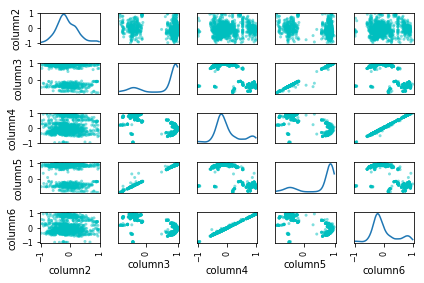

In [9]:
pd.plotting.scatter_matrix(data.loc[:, "column2":"column6"], diagonal="kde", c='c')
plt.tight_layout()
plt.show()

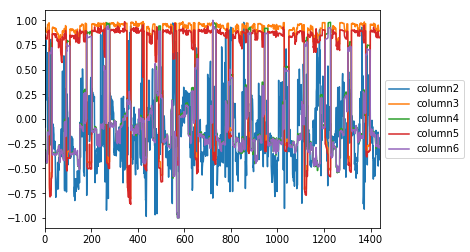

In [10]:
ax = data[["column2","column3","column4","column5","column6"]].plot() 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [11]:
inputData = data.loc[:, "column1":"column35"]

In [12]:
# Looking at summary statistics

In [13]:
inputData.apply(np.mean)[0:5]

column1   -0.463760
column2   -0.112395
column3    0.664568
column4   -0.004641
column5    0.603760
dtype: float64

In [14]:
inputData.apply(np.std)[0:5]

column1    0.521727
column2    0.342083
column3    0.526896
column4    0.402207
column5    0.521866
dtype: float64

In [15]:
inputData.apply(np.min)[0:5]

column1   -0.9524
column2   -0.9848
column3   -0.8069
column4   -0.9998
column5   -0.8632
dtype: float64

In [16]:
inputData.apply(np.max)[0:5]

column1    0.7864
column2    0.9786
column3    0.9883
column4    0.9828
column5    0.9857
dtype: float64

In [17]:
# Look at the correlation matrix
corrmat = inputData.corr()
round(corrmat,3)

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column26,column27,column28,column29,column30,column31,column32,column33,column34,column35
column1,1.000,-0.393,0.411,-0.456,0.420,-0.448,0.402,-0.462,0.402,-0.211,...,0.948,0.930,0.929,0.910,0.958,0.968,0.937,0.946,-0.395,0.436
column2,-0.393,1.000,-0.184,0.119,-0.192,0.116,-0.179,0.125,-0.175,0.154,...,-0.365,-0.374,-0.364,-0.373,-0.387,-0.395,-0.377,-0.369,0.172,-0.104
column3,0.411,-0.184,1.000,-0.728,0.998,-0.726,0.999,-0.730,0.988,0.234,...,0.447,0.456,0.434,0.482,0.412,0.413,0.461,0.445,-0.990,0.725
column4,-0.456,0.119,-0.728,1.000,-0.729,0.999,-0.724,0.998,-0.728,-0.100,...,-0.503,-0.511,-0.492,-0.534,-0.460,-0.459,-0.521,-0.503,0.692,-0.994
column5,0.420,-0.192,0.998,-0.729,1.000,-0.726,0.995,-0.733,0.985,0.214,...,0.458,0.467,0.445,0.494,0.429,0.428,0.474,0.456,-0.987,0.726
column6,-0.448,0.116,-0.726,0.999,-0.726,1.000,-0.723,0.995,-0.727,-0.117,...,-0.495,-0.503,-0.484,-0.524,-0.446,-0.447,-0.509,-0.495,0.691,-0.993
column7,0.402,-0.179,0.999,-0.724,0.995,-0.723,1.000,-0.725,0.987,0.250,...,0.438,0.446,0.425,0.470,0.398,0.401,0.448,0.435,-0.990,0.722
column8,-0.462,0.125,-0.730,0.998,-0.733,0.995,-0.725,1.000,-0.730,-0.079,...,-0.509,-0.518,-0.499,-0.544,-0.475,-0.472,-0.532,-0.510,0.694,-0.992
column9,0.402,-0.175,0.988,-0.728,0.985,-0.727,0.987,-0.730,1.000,0.243,...,0.441,0.449,0.427,0.477,0.402,0.404,0.455,0.439,-0.992,0.727
column10,-0.211,0.154,0.234,-0.100,0.214,-0.117,0.250,-0.079,0.243,1.000,...,-0.154,-0.155,-0.160,-0.204,-0.276,-0.251,-0.220,-0.155,-0.256,0.105


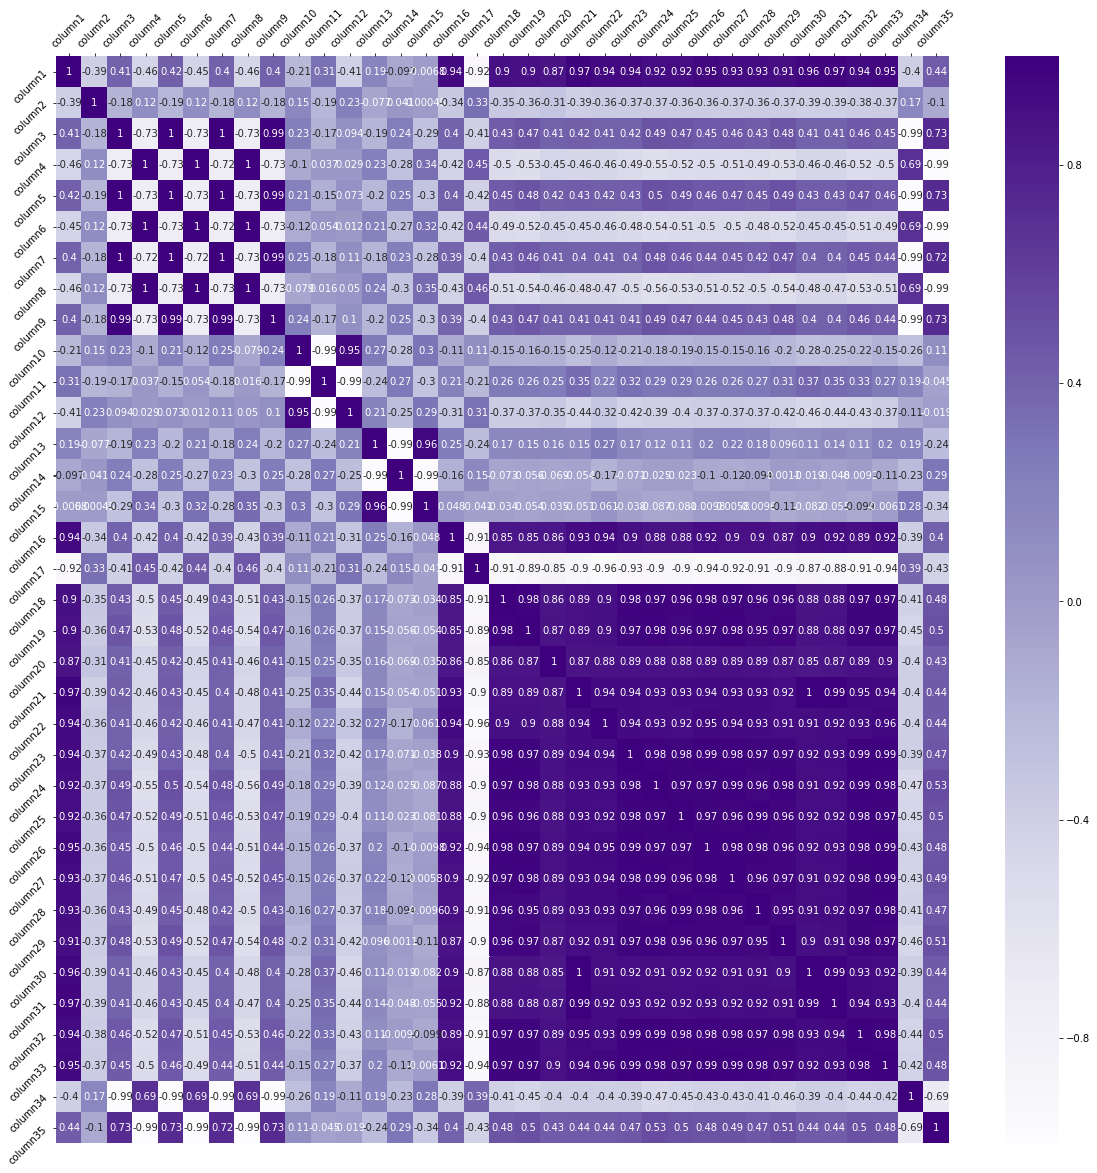

In [24]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=1., square=False, ax=ax, annot=True, cmap="Purples").xaxis.tick_top()


for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_rotation(45)

In [17]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [18]:
mosthighlycorrelated(inputData, 3)

,FirstVariable,SecondVariable,Correlation
0,column3,column7,0.999320
1,column4,column6,0.998852
2,column4,column8,0.998128


In [19]:
# This is our output
y = data. newActivity;
set(y)

{'LAYING',
 'LIFTING',
 'SITTING',
 'STANDING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS'}

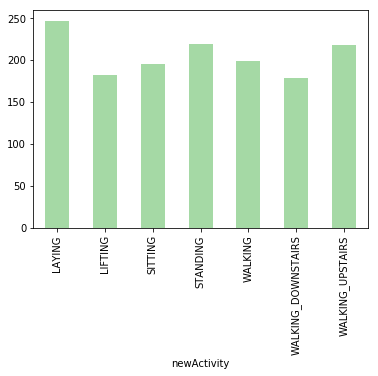

In [20]:
# How many different activites that we're trying to identify?
dd2 = data.groupby(['newActivity']).count()
dd2['column1'].plot(kind='bar', colormap='Accent', alpha = 0.7)

## PCA

In [21]:
# Apply PCA followed by K-Means
from sklearn.decomposition import PCA as sklearnPCA

In [22]:
# Find out how many PCA components would be ideal for the dataset
temp_pca = sklearnPCA(0.95).fit(inputData)
print('We need %d components to explain 95%% of variance' % temp_pca.n_components_)

We need 4 components to explain 95% of variance


In [23]:
# This shows that 95% of variance is explained by the 1st 4 principal components

sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(inputData)

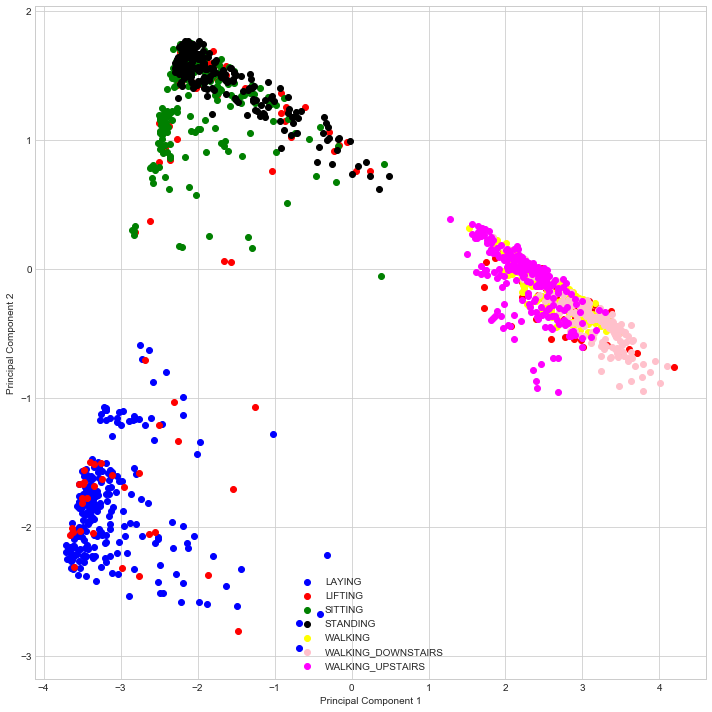

In [24]:
# PCA plot
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    for lab, col in zip(('LAYING', 'LIFTING','SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS'),
                        ('blue', 'red', 'green','black','yellow','pink','magenta')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    -1*Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

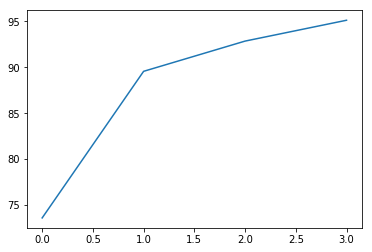

In [25]:
# Plot of Variance
var=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

# This also shows that 95% of variance is explained by the 1st 4 principal components

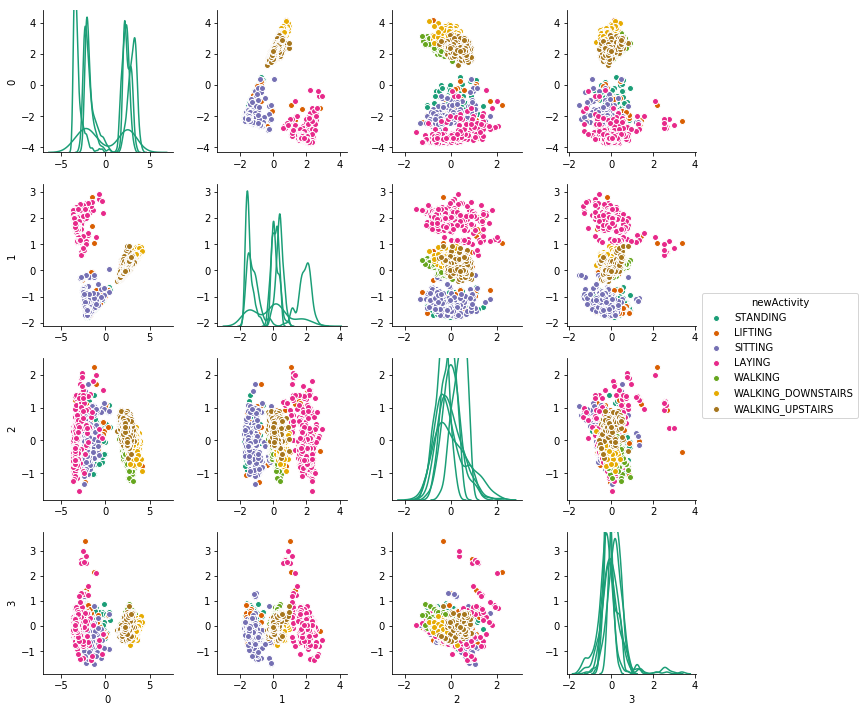

In [26]:
# Plot of PCA components against the target
Y2 = pd.DataFrame(Y_sklearn)
Y2['newActivity'] = data['newActivity']

sns.pairplot(Y2, hue='newActivity', palette= 'Dark2', diag_kind='kde',size=2.5)

## Clustering

### Silhoutte Coefficient & kMeans

In [27]:
# Create a bunch of different models
from sklearn.cluster import KMeans
k_rng = range(2,15)
k_est = [KMeans(n_clusters = k).fit(inputData) for k in k_rng]

In [28]:
# Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k
from sklearn import metrics
silhouette_score = [metrics.silhouette_score(inputData, e.labels_, metric='euclidean') for e in k_est]

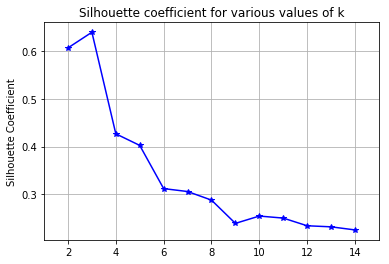

In [29]:
# Plot the results
plt.figure()
plt.title('Silhouette coefficient for various values of k')
plt.plot(k_rng, silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.show()

In [30]:
## Selecting number of clusters as 3 for kMeans
# since the value of Silhoutte Coefficient is highest (0.7) for 3

km = KMeans(n_clusters = 3)
Y_clustered = km.fit_predict(Y_sklearn)

In [31]:
# Define our own color map & centroid values
LABEL_COLOR_MAP = {0:'g', 1: 'y', 2: 'c'}
label_color = [LABEL_COLOR_MAP[l] for l in Y_clustered]
centroids = km.cluster_centers_

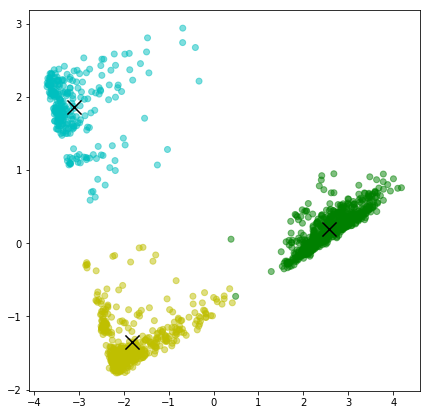

In [32]:
# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker = 'x', c= 'k',  linewidths=100)
plt.show()

### Hierarchical Clustering

In [33]:
# generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(inputData, 'ward')

In [34]:
def fancyDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

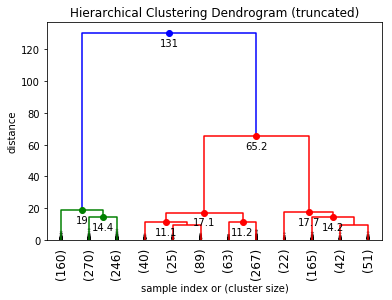

In [35]:
fancyDendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

## Modeling

In [36]:
# Create a training and a validation set:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(inputData, y,random_state=42)

# Following dataframe would be used to store scores for models
scores = pd.DataFrame(columns = ['Method', 'Precision', 'Recall', 'Accuracy', 'F1-Score'])

### Support Vector Machines

In [37]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.pipeline import make_pipeline

# pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
pca = PCA(svd_solver = 'randomized', n_components=15, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced', probability=True)
model_svc = make_pipeline(pca, svc)

In [38]:
# You can automate the searching of parameters for tuning your model

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid_svc = GridSearchCV(model_svc, param_grid)

model_svc = grid_svc.fit(Xtrain, ytrain)
model_svc = model_svc.best_estimator_
preds_svc = model_svc.predict(Xtest)

In [39]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_svc, average = "weighted")
r = metrics.recall_score(ytest, preds_svc, average = "weighted")
a = metrics.accuracy_score(ytest, preds_svc)
f = metrics.f1_score(ytest, preds_svc, average = "weighted")
scores.loc[-1] = ['Support Vector', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
svcConfusionMatrix = metrics.confusion_matrix(ytest, preds_svc)

In [40]:
# Classification report of model scores
from sklearn.metrics import classification_report
print(classification_report(ytest, preds_svc))

                    precision    recall  f1-score   support

            LAYING       0.88      1.00      0.94        65
           LIFTING       0.00      0.00      0.00        41
           SITTING       0.78      0.82      0.80        60
          STANDING       0.70      0.85      0.77        47
           WALKING       0.88      0.93      0.91        46
WALKING_DOWNSTAIRS       0.89      0.93      0.91        43
  WALKING_UPSTAIRS       0.89      0.97      0.93        58

       avg / total       0.74      0.81      0.78       360



### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb = GaussianNB()
model_nb = gnb.fit(Xtrain, ytrain)
preds_nb = gnb.predict(Xtest)

In [42]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_nb, average = "weighted")
r = metrics.recall_score(ytest, preds_nb, average = "weighted")
a = metrics.accuracy_score(ytest, preds_nb)
f = metrics.f1_score(ytest, preds_nb, average = "weighted")
scores.loc[-1] = ['Naive Bayes', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
nbConfusionMatrix = metrics.confusion_matrix(ytest, preds_nb)

In [43]:
# Classification report of model scores
print(classification_report(ytest, preds_nb))

                    precision    recall  f1-score   support

            LAYING       0.88      0.92      0.90        65
           LIFTING       0.08      0.02      0.04        41
           SITTING       0.79      0.68      0.73        60
          STANDING       0.57      0.77      0.65        47
           WALKING       0.73      0.78      0.76        46
WALKING_DOWNSTAIRS       0.70      0.81      0.75        43
  WALKING_UPSTAIRS       0.74      0.83      0.78        58

       avg / total       0.67      0.71      0.69       360



### K Nearest Neighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =6)
model_k = knn.fit(Xtrain, ytrain)

In [45]:
param_grid_kn = {'n_neighbors': [3, 5, 7, 10],
              'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'minkowski', 'manhattan']}

grid_kn = GridSearchCV(model_k, param_grid_kn)

model_k = grid_kn.fit(Xtrain, ytrain)

model_k = model_k.best_estimator_
preds_k = model_k.predict(Xtest)

In [46]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_k, average = "weighted")
r = metrics.recall_score(ytest, preds_k, average = "weighted")
a = metrics.accuracy_score(ytest, preds_k)
f = metrics.f1_score(ytest, preds_k, average = "weighted")
scores.loc[-1] = ['kNN', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
knConfusionMatrix = metrics.confusion_matrix(ytest, preds_k)

In [47]:
# Classification report of model scores
print(classification_report(ytest, preds_k))

                    precision    recall  f1-score   support

            LAYING       0.88      1.00      0.94        65
           LIFTING       0.00      0.00      0.00        41
           SITTING       0.82      0.90      0.86        60
          STANDING       0.75      0.87      0.80        47
           WALKING       0.88      1.00      0.94        46
WALKING_DOWNSTAIRS       0.93      0.98      0.95        43
  WALKING_UPSTAIRS       0.85      0.98      0.91        58

       avg / total       0.75      0.85      0.80       360



### Decision Trees

In [48]:
# define X (features) and y (response)
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=12)
model_dt = treeclf.fit(Xtrain, ytrain)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [1, 3, 5, 8, 13, 23, 28, 33, 38, 43, 48]}
grid_dt = GridSearchCV(model_dt, param_grid)

model_dt = grid_dt.fit(Xtrain, ytrain)

model_dt = model_dt.best_estimator_
preds_dt = model_dt.predict(Xtest)

In [50]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_dt, average = "weighted")
r = metrics.recall_score(ytest, preds_dt, average = "weighted")
a = metrics.accuracy_score(ytest, preds_dt)
f = metrics.f1_score(ytest, preds_dt, average = "weighted")
scores.loc[-1] = ['Decision Trees', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
dtConfusionMatrix = metrics.confusion_matrix(ytest, preds_dt)

In [51]:
# Classification report of model scores
print(classification_report(ytest,preds_dt))

                    precision    recall  f1-score   support

            LAYING       0.87      0.92      0.90        65
           LIFTING       0.00      0.00      0.00        41
           SITTING       0.83      0.82      0.82        60
          STANDING       0.68      0.87      0.77        47
           WALKING       0.78      0.83      0.80        46
WALKING_DOWNSTAIRS       0.86      0.86      0.86        43
  WALKING_UPSTAIRS       0.74      0.91      0.82        58

       avg / total       0.71      0.77      0.74       360



### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, verbose=3)
model_r = rfc.fit(Xtrain, ytrain)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [53]:
param_grid = {'n_estimators': [5, 7, 10, 12]
              
             }
grid_r = GridSearchCV(model_r, param_grid)

model_r = grid_r.fit(Xtrain, ytrain)

model_r = model_r.best_estimator_
preds_r = model_r.predict(Xtest)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(

In [54]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_r, average = "weighted")
r = metrics.recall_score(ytest, preds_r, average = "weighted")
a = metrics.accuracy_score(ytest, preds_r)
f = metrics.f1_score(ytest, preds_r, average = "weighted")
scores.loc[-1] = ['Random Forest', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
rfConfusionMatrix = metrics.confusion_matrix(ytest, preds_r)

In [55]:
# Classification report of model scores
print(classification_report(ytest, preds_r))

                    precision    recall  f1-score   support

            LAYING       0.88      0.98      0.93        65
           LIFTING       0.11      0.05      0.07        41
           SITTING       0.80      0.85      0.82        60
          STANDING       0.78      0.81      0.79        47
           WALKING       0.84      0.89      0.86        46
WALKING_DOWNSTAIRS       0.85      0.91      0.88        43
  WALKING_UPSTAIRS       0.87      0.91      0.89        58

       avg / total       0.75      0.80      0.77       360



### Extra Trees Classifier

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model_e = etc.fit(Xtrain, ytrain)

preds_e = model_e.predict(Xtest)

In [57]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_e, average = "weighted")
r = metrics.recall_score(ytest, preds_e, average = "weighted")
a = metrics.accuracy_score(ytest, preds_e)
f = metrics.f1_score(ytest, preds_e, average = "weighted")
scores.loc[-1] = ['Extra Trees', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
etcConfusionMatrix = metrics.confusion_matrix(ytest, preds_e)

In [58]:
# Classification report of model scores
print(classification_report(ytest, preds_e))

                    precision    recall  f1-score   support

            LAYING       0.87      0.95      0.91        65
           LIFTING       0.09      0.05      0.06        41
           SITTING       0.79      0.83      0.81        60
          STANDING       0.78      0.77      0.77        47
           WALKING       0.88      0.98      0.93        46
WALKING_DOWNSTAIRS       0.87      0.91      0.89        43
  WALKING_UPSTAIRS       0.84      0.88      0.86        58

       avg / total       0.75      0.79      0.77       360



### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1)
model_g = gbc.fit(Xtrain, ytrain)

In [66]:
param_grid_g = {'n_estimators': [100, 200, 300],
    'max_depth':[4, 5, 6, 10]
             }
grid_g = GridSearchCV(model_g, param_grid_g)
model_g = grid_g.fit(Xtrain, ytrain)
model_g = model_g.best_estimator_
preds_g = model_g.predict(Xtest)

In [68]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_g, average = "weighted")
r = metrics.recall_score(ytest, preds_g, average = "weighted")
a = metrics.accuracy_score(ytest, preds_g)
f = metrics.f1_score(ytest, preds_g, average = "weighted")
scores.loc[-1] = ['Gradient Boosting', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
gbcConfusionMatrix = metrics.confusion_matrix(ytest, preds_g)

In [69]:
# Classification report of model scores
print(classification_report(ytest, preds_g))

                    precision    recall  f1-score   support

            LAYING       0.89      0.95      0.92        65
           LIFTING       0.05      0.02      0.03        41
           SITTING       0.85      0.83      0.84        60
          STANDING       0.76      0.89      0.82        47
           WALKING       0.87      0.98      0.92        46
WALKING_DOWNSTAIRS       0.89      0.95      0.92        43
  WALKING_UPSTAIRS       0.88      0.88      0.88        58

       avg / total       0.77      0.81      0.79       360



### Ensemble Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('svm', grid_svc), ('dt', grid_dt), ('rf', grid_r), ('knn', grid_kn), ('gb', grid_g)],
                        voting='soft')

model_vo = eclf.fit(Xtrain, ytrain)
preds_vo = model_vo.predict(Xtest)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 10 of 10
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(

In [71]:
# Add to score matrix
p = metrics.precision_score(ytest, preds_vo, average = "weighted")
r = metrics.recall_score(ytest, preds_vo, average = "weighted")
a = metrics.accuracy_score(ytest, preds_vo)
f = metrics.f1_score(ytest, preds_vo, average = "weighted")
scores.loc[-1] = ['Voting Classifier', p, r, a, f]
scores.index = scores.index + 1
scores = scores.sort_index()

# Confusion matrix
voConfusionMatrix = metrics.confusion_matrix(ytest, preds_vo)

In [72]:
# Classification report of model scores
print(classification_report(ytest, preds_vo))

                    precision    recall  f1-score   support

            LAYING       0.88      0.98      0.93        65
           LIFTING       0.00      0.00      0.00        41
           SITTING       0.82      0.92      0.87        60
          STANDING       0.79      0.87      0.83        47
           WALKING       0.88      1.00      0.94        46
WALKING_DOWNSTAIRS       0.90      1.00      0.95        43
  WALKING_UPSTAIRS       0.89      0.98      0.93        58

       avg / total       0.76      0.85      0.80       360



### Visualization of scores

View the confusion matrices for all the models

Text(0.5,1,'Voting Ensemble')

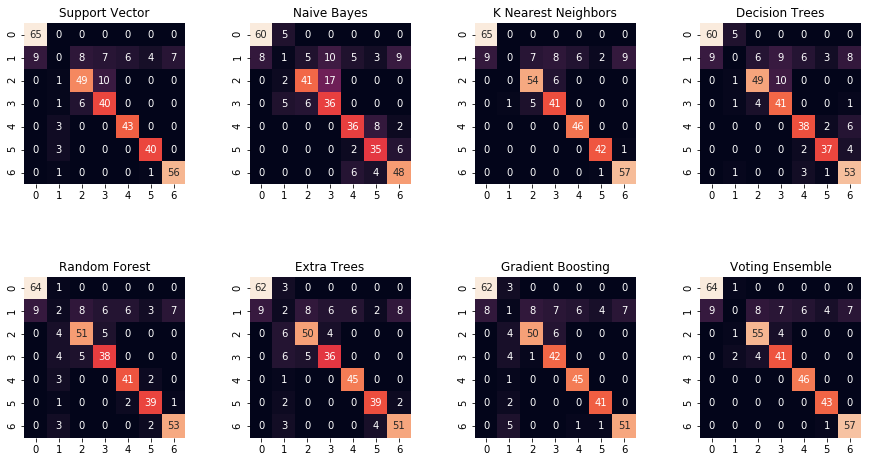

In [73]:
fig, ax = plt.subplots(2, 4, figsize=(15,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.heatmap(svcConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[0][0])
ax[0][0].set_title('Support Vector')

sns.heatmap(nbConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[0][1])
ax[0][1].set_title('Naive Bayes')

sns.heatmap(knConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[0][2])
ax[0][2].set_title('K Nearest Neighbors')

sns.heatmap(dtConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[0][3])
ax[0][3].set_title('Decision Trees')

sns.heatmap(rfConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[1][0])
ax[1][0].set_title('Random Forest')

sns.heatmap(etcConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[1][1])
ax[1][1].set_title('Extra Trees')

sns.heatmap(gbcConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[1][2])
ax[1][2].set_title('Gradient Boosting')

sns.heatmap(voConfusionMatrix, square=True, annot=True, fmt='d', cbar=False, ax=ax[1][3])
ax[1][3].set_title('Voting Ensemble')

Plot of few of the models with top scores

In [74]:
Y1 = data.copy()
rep_act = {"newActivity":     {"LAYING" : 1, 
                               "LIFTING" : 2,
                              "SITTING" : 3,
                               "STANDING" : 4,
                               "WALKING" : 5,
                               "WALKING_DOWNSTAIRS" : 6,
                               "WALKING_UPSTAIRS" : 7
                              }
          }
Y1.replace(rep_act, inplace=True)
Y = Y1.newActivity

Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(inputData, Y,random_state=42)

X = Xtrain1.loc[:, ["column3","column7"]].copy()

In [75]:
Y = ytrain1
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Decision Tree
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Random Forest


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Gradient Boosting
Extra Trees
SVM
KNN


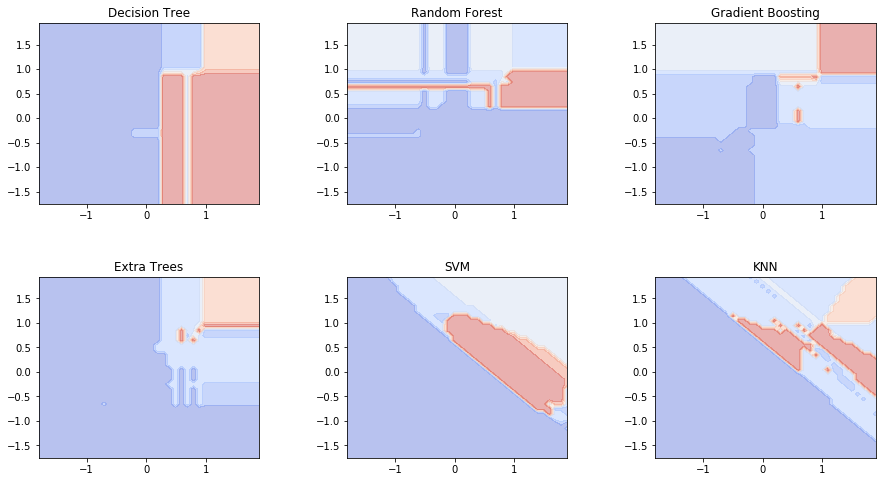

In [76]:
models = [treeclf, rfc, gbc, etc, svc, knn]
models = (clf.fit(X, Y) for clf in models)
names = ["Decision Tree", "Random Forest", "Gradient Boosting", "Extra Trees", "SVM", "KNN"]

fig, sub = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for clf, title, ax in zip(models, names, sub.flatten()):
    print (title, flush=True)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    ax.set_title(title)
plt.show()

View the scores for all the models

In [77]:
scores["Precision"] = scores["Precision"] * 100
scores["Recall"] = scores["Recall"] * 100
scores["Accuracy"] = scores["Accuracy"] * 100
scores["F1-Score"] = scores["F1-Score"] * 100

In [78]:
# View the scores in descending order of F1 Score
scores = scores.sort_values('F1-Score', ascending = False)
scores

,Method,Precision,Recall,Accuracy,F1-Score
0,Voting Classifier,76.157532,85.000000,85.000000,80.334836
5,kNN,75.386331,84.722222,84.722222,79.758161
1,Gradient Boosting,76.525993,81.111111,81.111111,78.621359
7,Support Vector,74.135789,81.388889,81.388889,77.546960
3,Random Forest,75.317527,80.000000,80.000000,77.413114
2,Extra Trees,75.298373,79.166667,79.166667,77.084201
4,Decision Trees,70.510230,77.222222,77.222222,73.536589
6,Naive Bayes,67.055086,71.388889,71.388889,68.709551


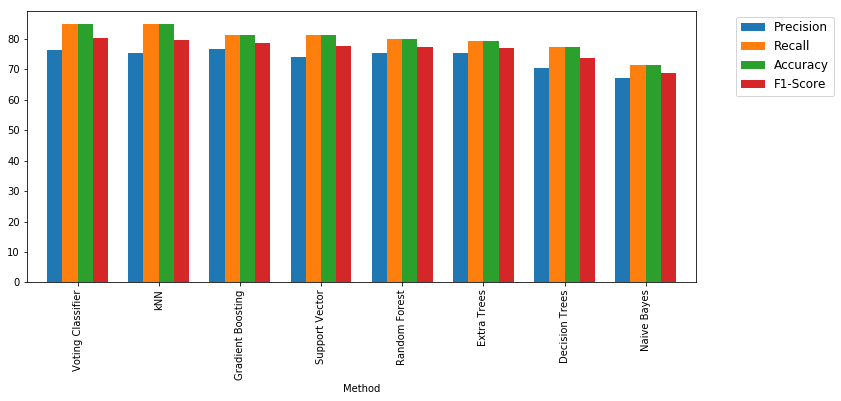

In [79]:
# Plot the scores
fig, ax = plt.subplots(figsize=(12,5))
scores.plot(x='Method', y=['Precision', 'Recall', 'Accuracy', 'F1-Score'], kind = "bar", ax = ax, width = 0.75)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1.05, 1), fontsize = 'large')

Here, the top scorers are:
    - F1-Score: Ensemble Voting, kNN, Gradient Boosting
    - Accuracy: Ensemble Voting, kNN, SVM
    - Precision: Gradient Boosting, Ensemble Voting, kNN
    - Recall: Ensemble Voting, kNN, SVM

Since, Ensemble Voting Classifier has the highest Accuracy, F1-score & Recall, as well as 2nd highest Precision
we will save it as the Best Model


### Best Model

Saving GradientBoostingClassifier predictions as the best model

In [82]:
testData = pd.read_csv('humanActivityProjectTest.csv')

In [83]:
# Create the predictions with GradientBoostingClassifier as the best model
bestModel = eclf.fit(Xtrain, ytrain)
resultsForSubmission = bestModel.predict(testData)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 7
building tree 2 of 7
building tree 3 of 7
building tree 4 of 7
building tree 5 of 7
building tree 6 of 7
building tree 7 of 7
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
b

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12
building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(

In [84]:
# Save the output
testData['Results'] = resultsForSubmission
testData.to_csv('testData_RituparnaGupta.csv')

In [85]:
# Predictions saved to testData_RituparnaGupta.csv

## Thank You!